In [2]:
!yolo task=classify train data=./classification-data model=yolov8n-cls.pt epochs=300 imgsz=600

New https://pypi.org/project/ultralytics/8.2.2 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.45 🚀 Python-3.8.10 torch-2.0.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=./classification-data, epochs=300, time=None, patience=100, batch=16, imgsz=600, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show

In [3]:
from IPython.display import display, Image

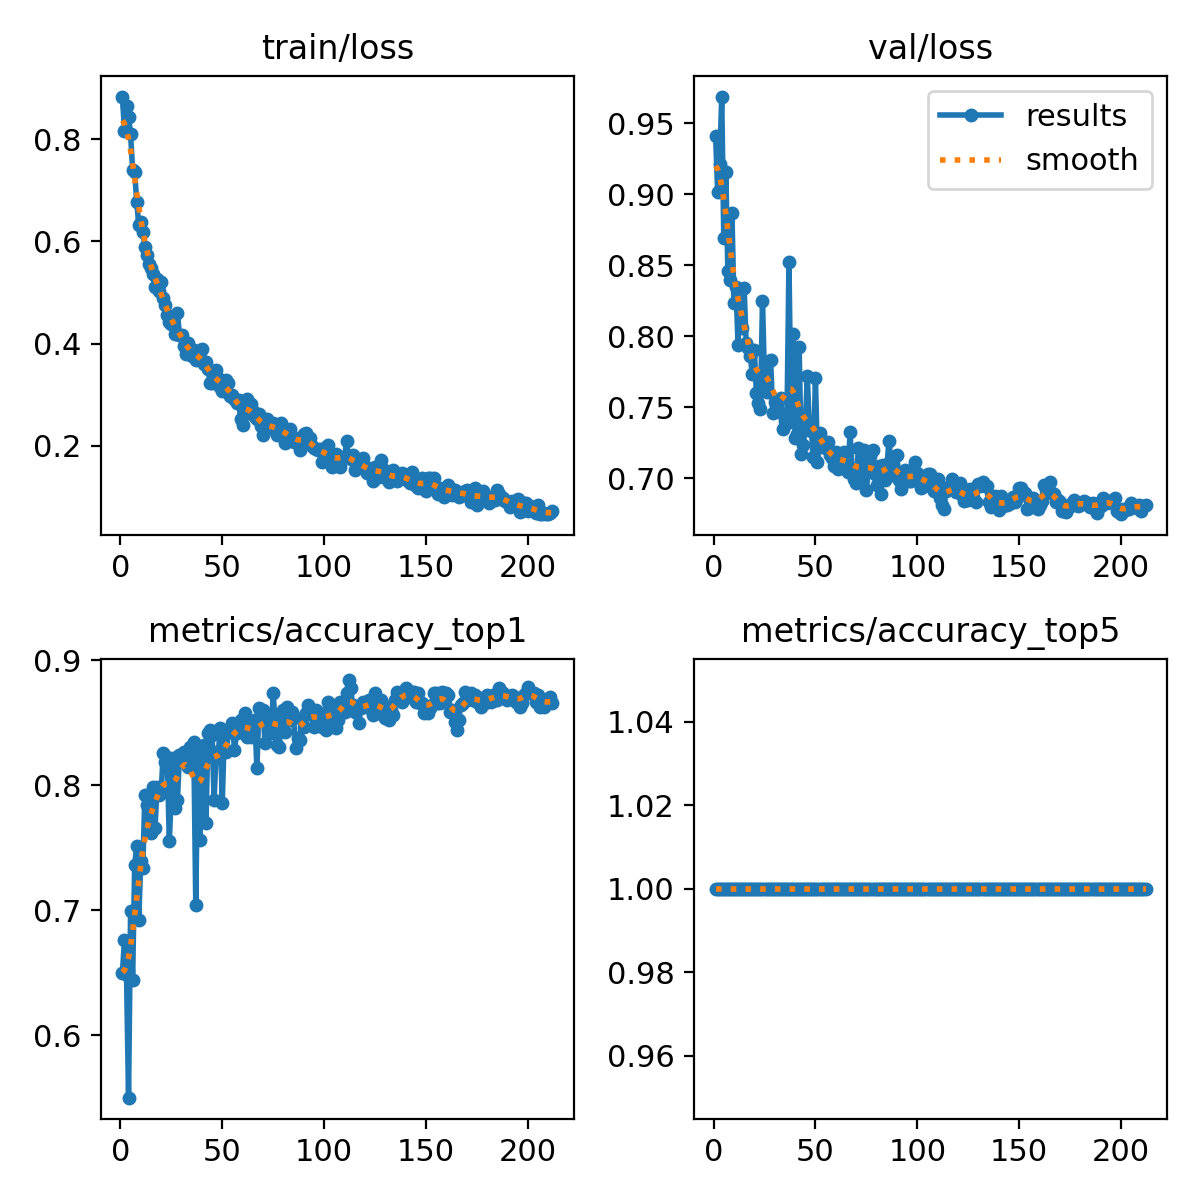

In [4]:
Image(filename="runs/classify/train/results.png", width=600)

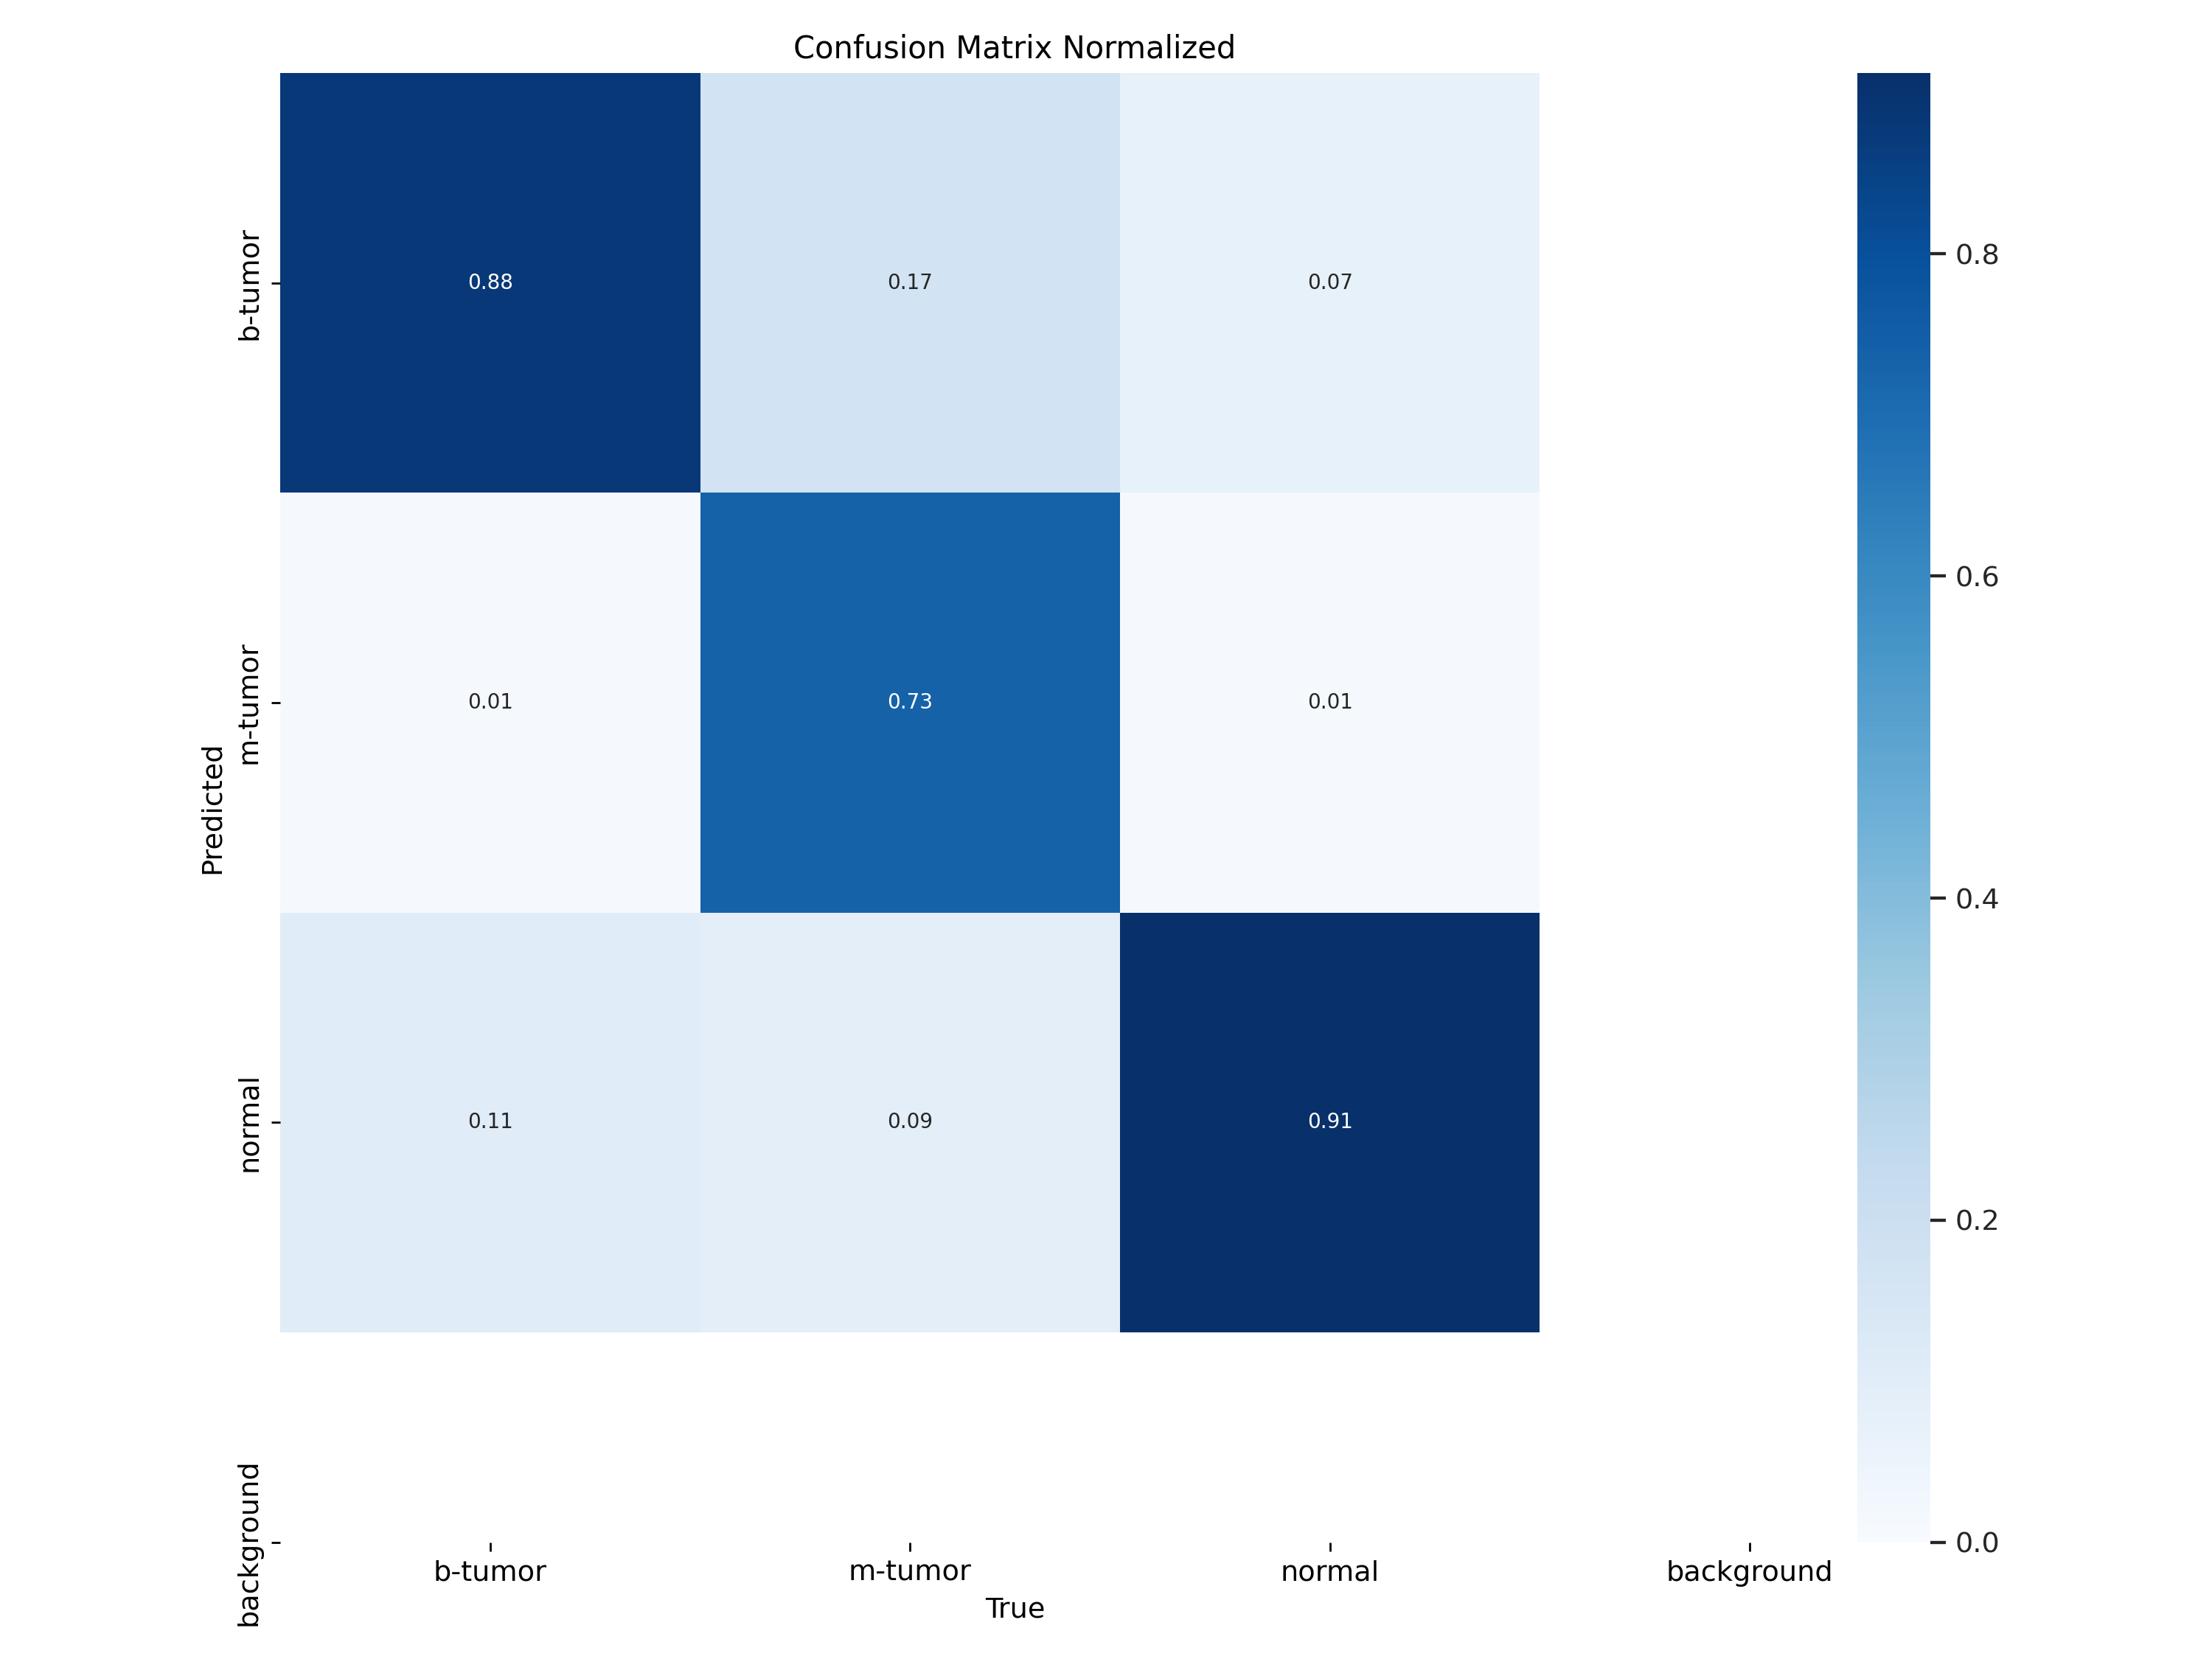

In [5]:
Image(filename="runs/classify/train/confusion_matrix_normalized.png", width=600)

In [1]:
!yolo task=classify mode=predict save=True model=runs/classify/train/weights/best.pt conf=0.25 source="./Pred"

Ultralytics YOLOv8.1.45 🚀 Python-3.8.10 torch-2.0.0+cu118 CPU (Intel Xeon Gold 6430)
YOLOv8n-cls summary (fused): 73 layers, 1438723 parameters, 0 gradients, 3.3 GFLOPs

image 1/6 /root/Pred/IMG000020.jpeg: 608x608 m-tumor 1.00, b-tumor 0.00, normal 0.00, 101.6ms
image 2/6 /root/Pred/IMG000059.jpeg: 608x608 m-tumor 1.00, b-tumor 0.00, normal 0.00, 104.1ms
image 3/6 /root/Pred/IMG000183.jpeg: 608x608 m-tumor 1.00, b-tumor 0.00, normal 0.00, 99.5ms
image 4/6 /root/Pred/IMG000508.jpeg: 608x608 b-tumor 1.00, m-tumor 0.00, normal 0.00, 126.5ms
image 5/6 /root/Pred/IMG000532.jpeg: 608x608 b-tumor 1.00, m-tumor 0.00, normal 0.00, 95.0ms
image 6/6 /root/Pred/IMG000758.jpeg: 608x608 b-tumor 1.00, normal 0.00, m-tumor 0.00, 100.4ms
Speed: 119.6ms preprocess, 104.5ms inference, 0.0ms postprocess per image at shape (1, 3, 608, 608)
Results saved to runs/classify/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
from PIL import Image
import os
import random

folder_path = 'runs/classify/predict'


image_filenames = os.listdir(folder_path)
random_images = random.sample(image_filenames, 4)
grid_image = Image.new('RGB', (800, 800))


for i in range(4):

    current_image = Image.open(os.path.join(folder_path, random_images[i]))
    current_image.thumbnail((400, 400))
    x = (i % 2) * 400
    y = (i // 2) * 400
    grid_image.paste(current_image, (x, y))

display(grid_image)
